In [15]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from mpl_toolkits.axes_grid1 import AxesGrid

In [16]:
p = "T5/t3"

fed = "fed_ll_sig_e_full/corr_fuse"
non = "non/corr_fuse"

fn1 = "featue_vec_r_3999_d_{}_{}.txt"
fn = "featue_vec_r_1999_d_{}_{}.txt"


In [17]:
ds = [x for x in range(12)] # multiplex dimension
fs = [0 for x in range(1)] # dim 0
gs = [x for x in range(4)] # dim 1

fed_fn = join(p,fed,fn1)
non_fn = join(p,non,fn)


s_fed_t = []
s_non_t = []

c_fed_t = []
c_non_t = []


(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)
(4, 32)


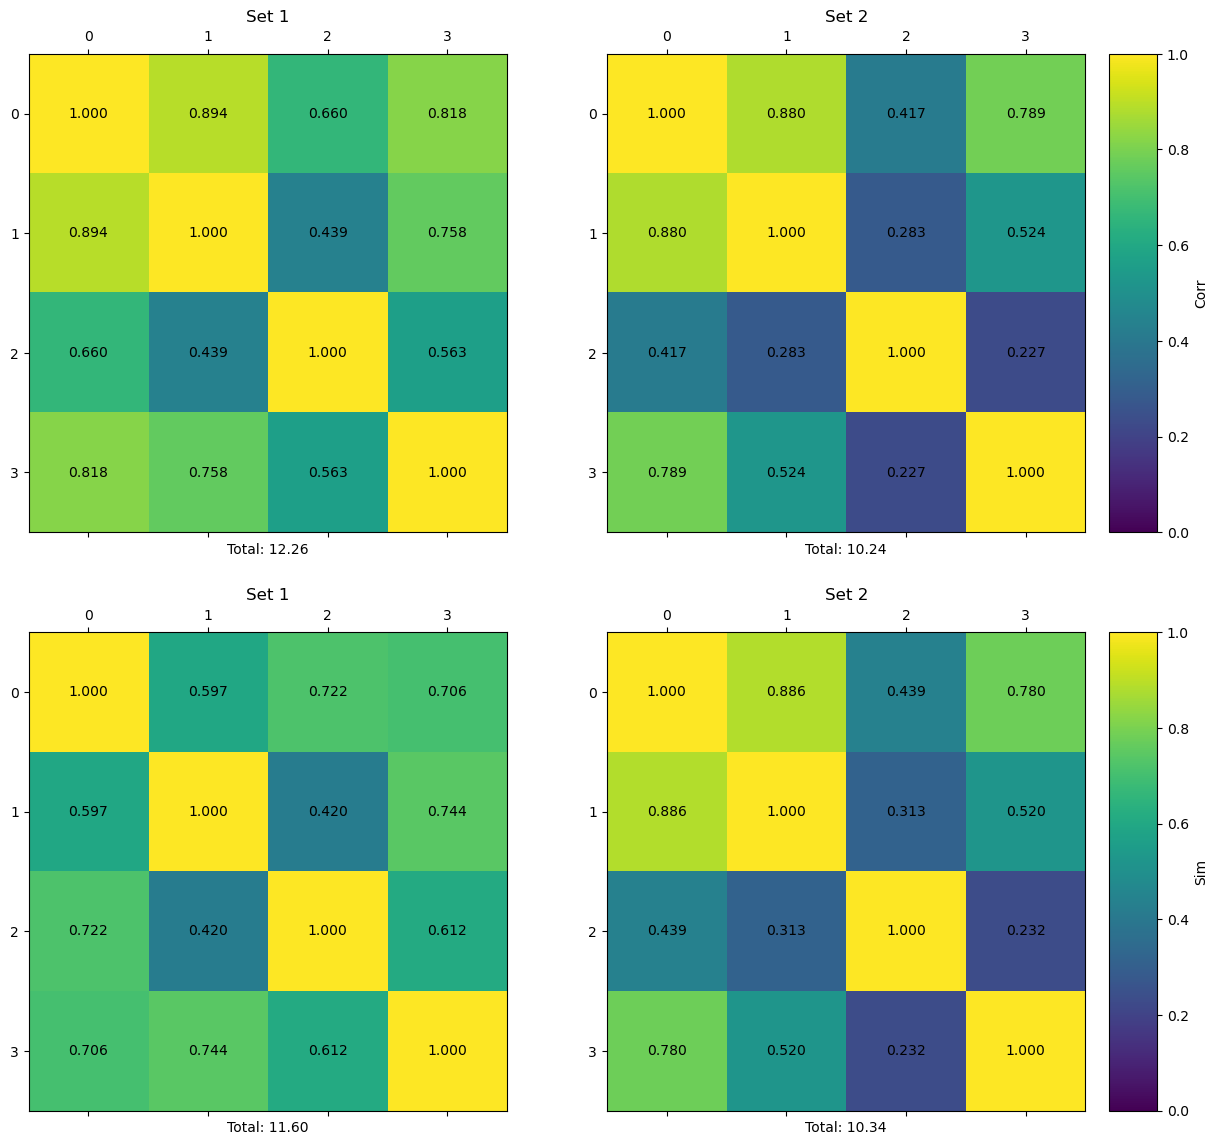

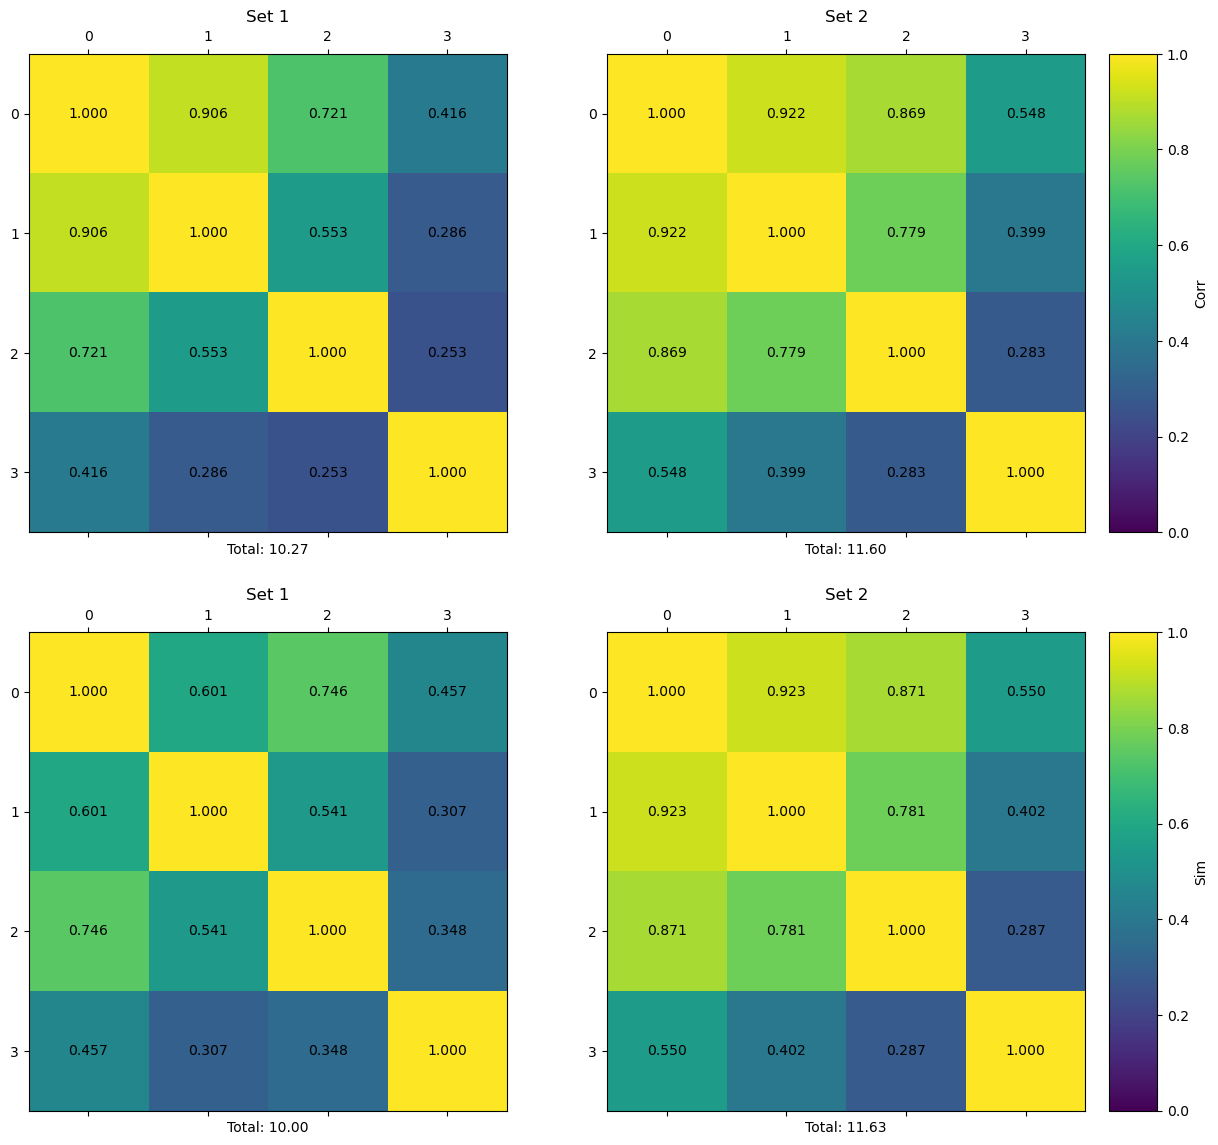

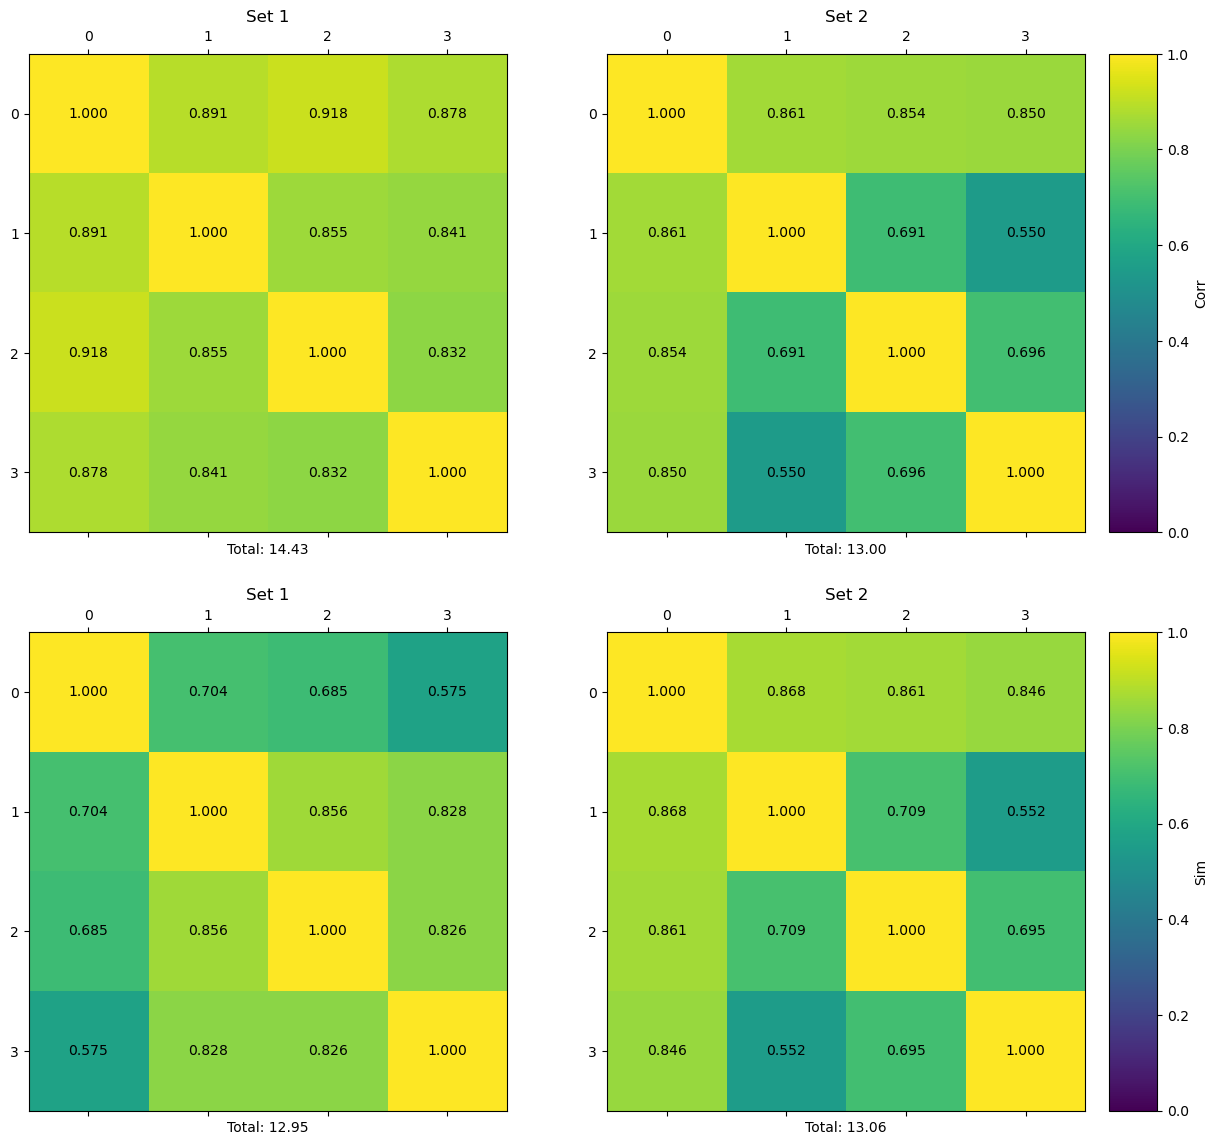

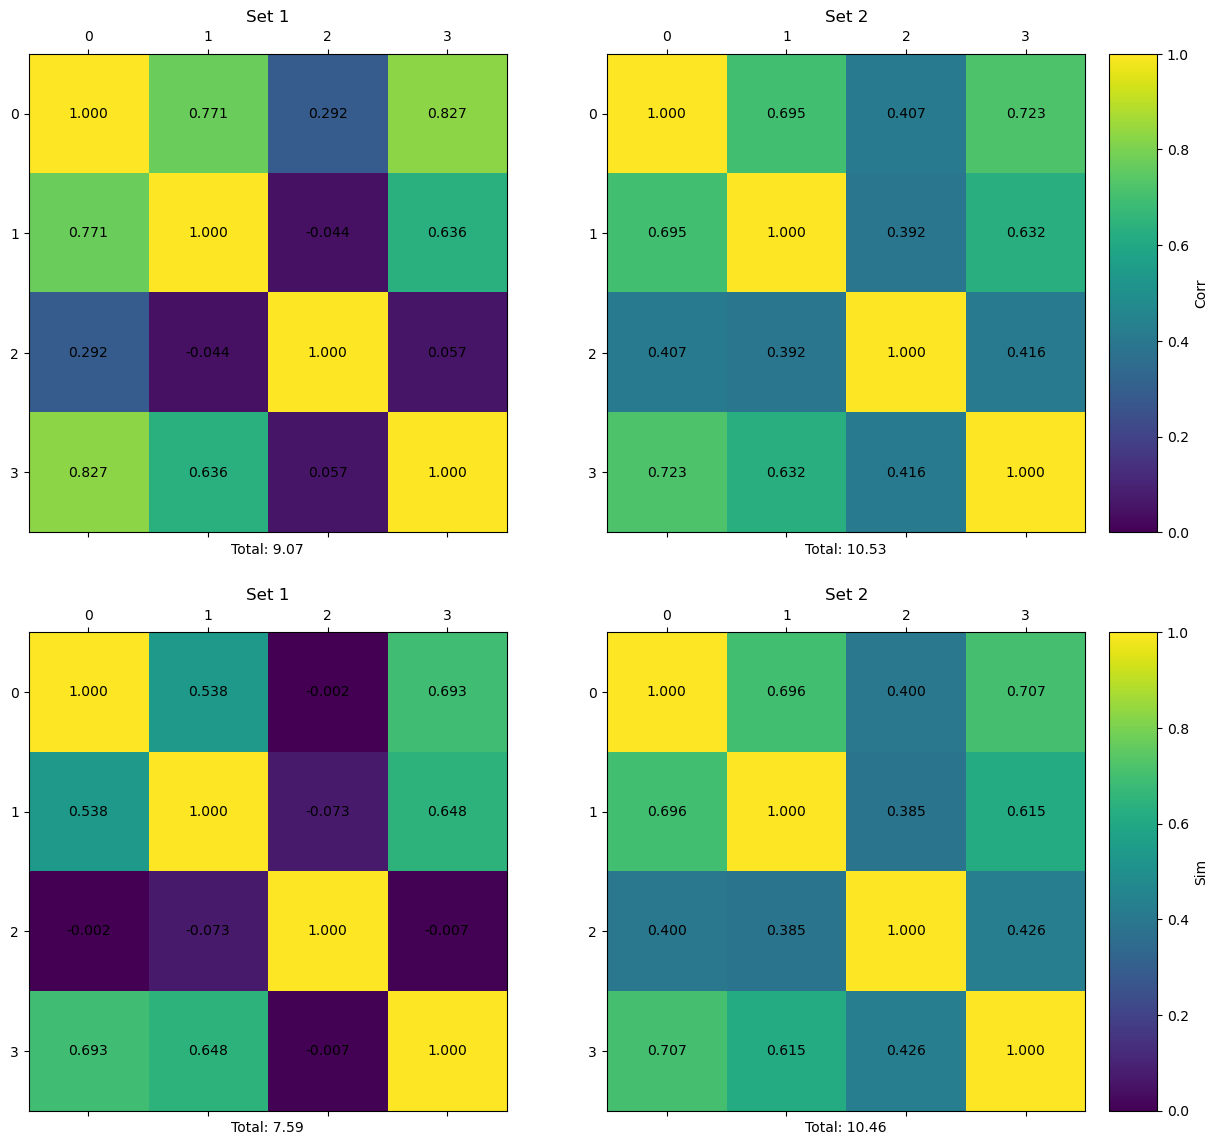

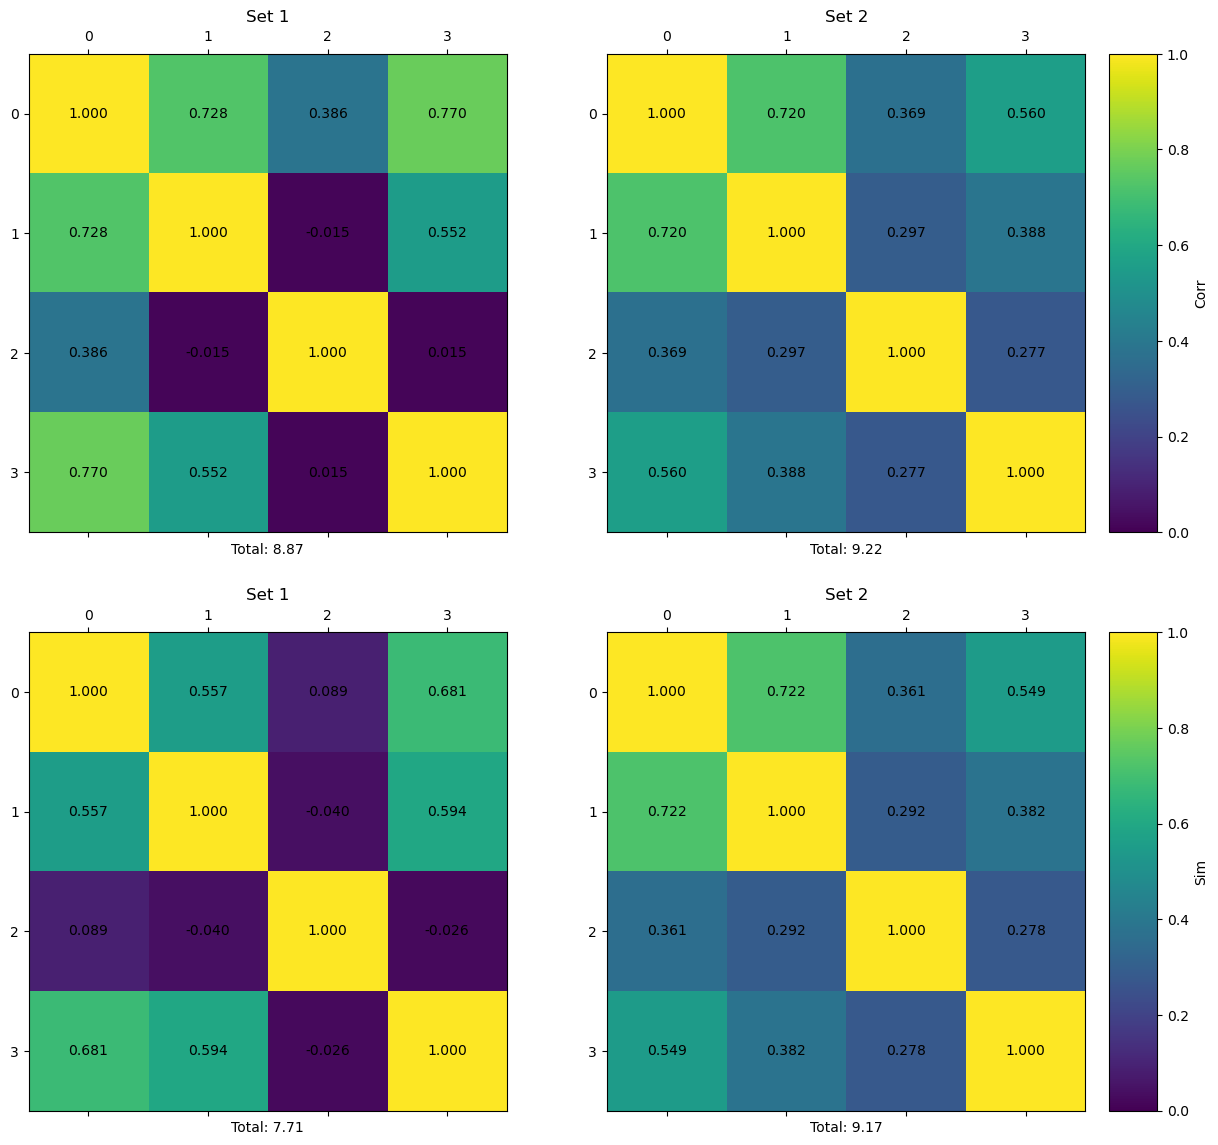

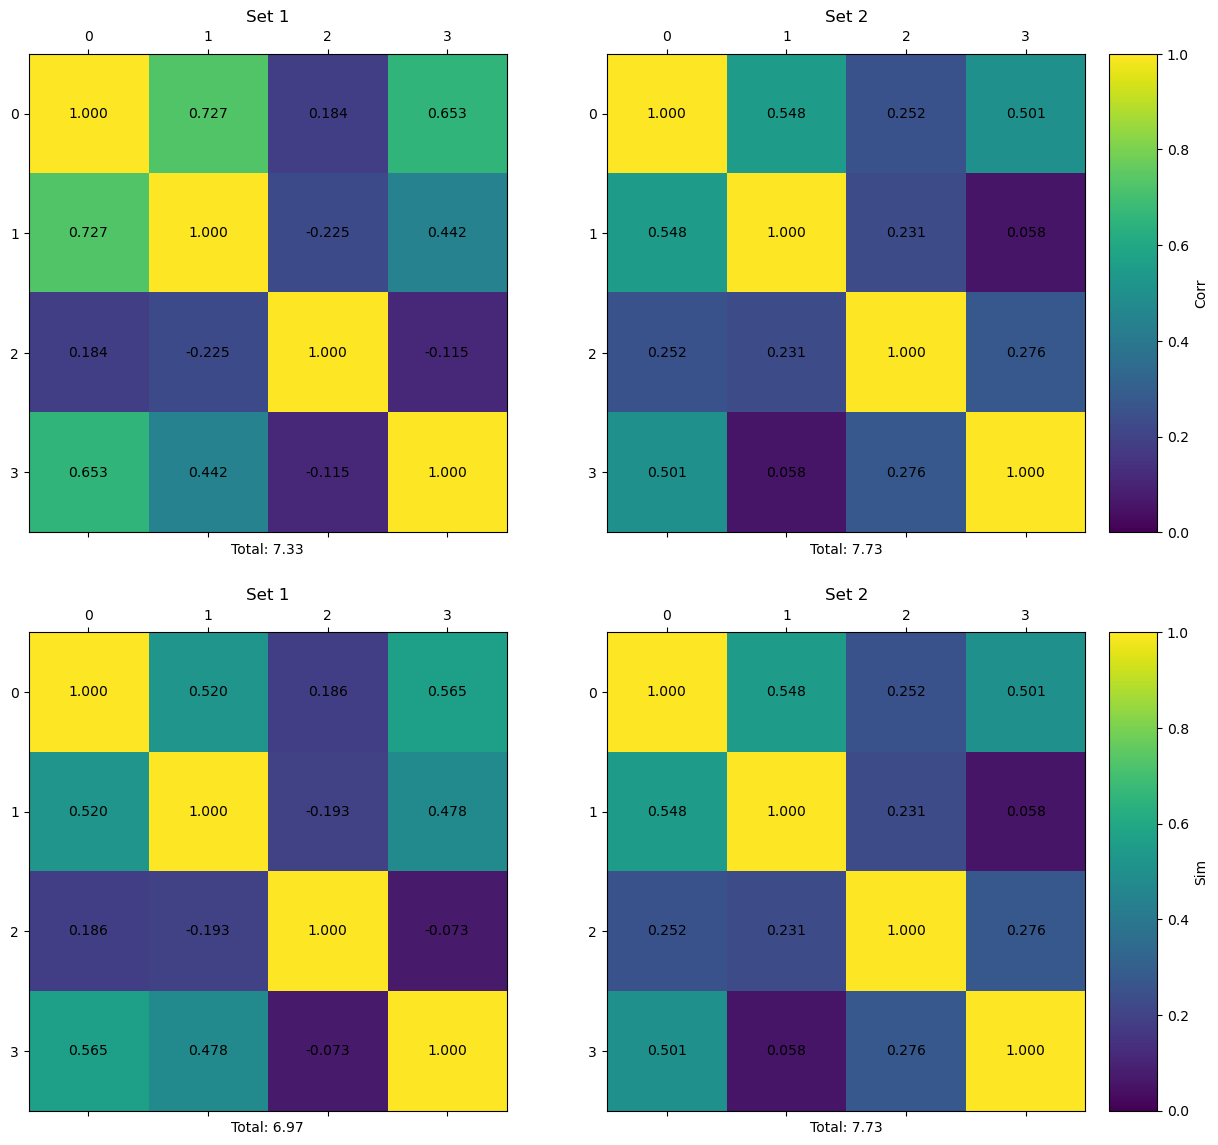

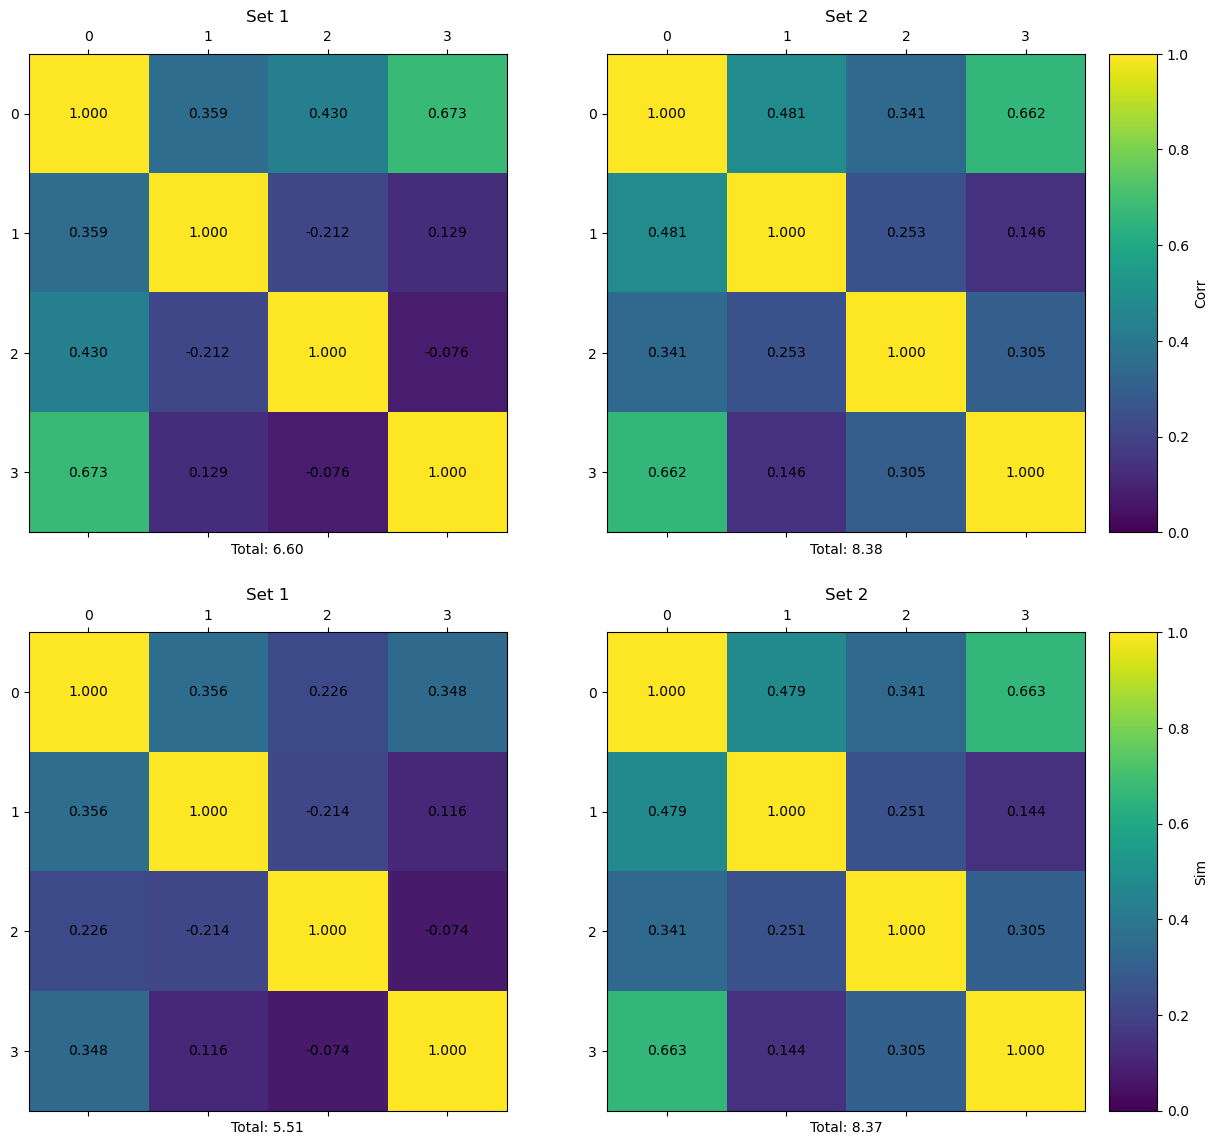

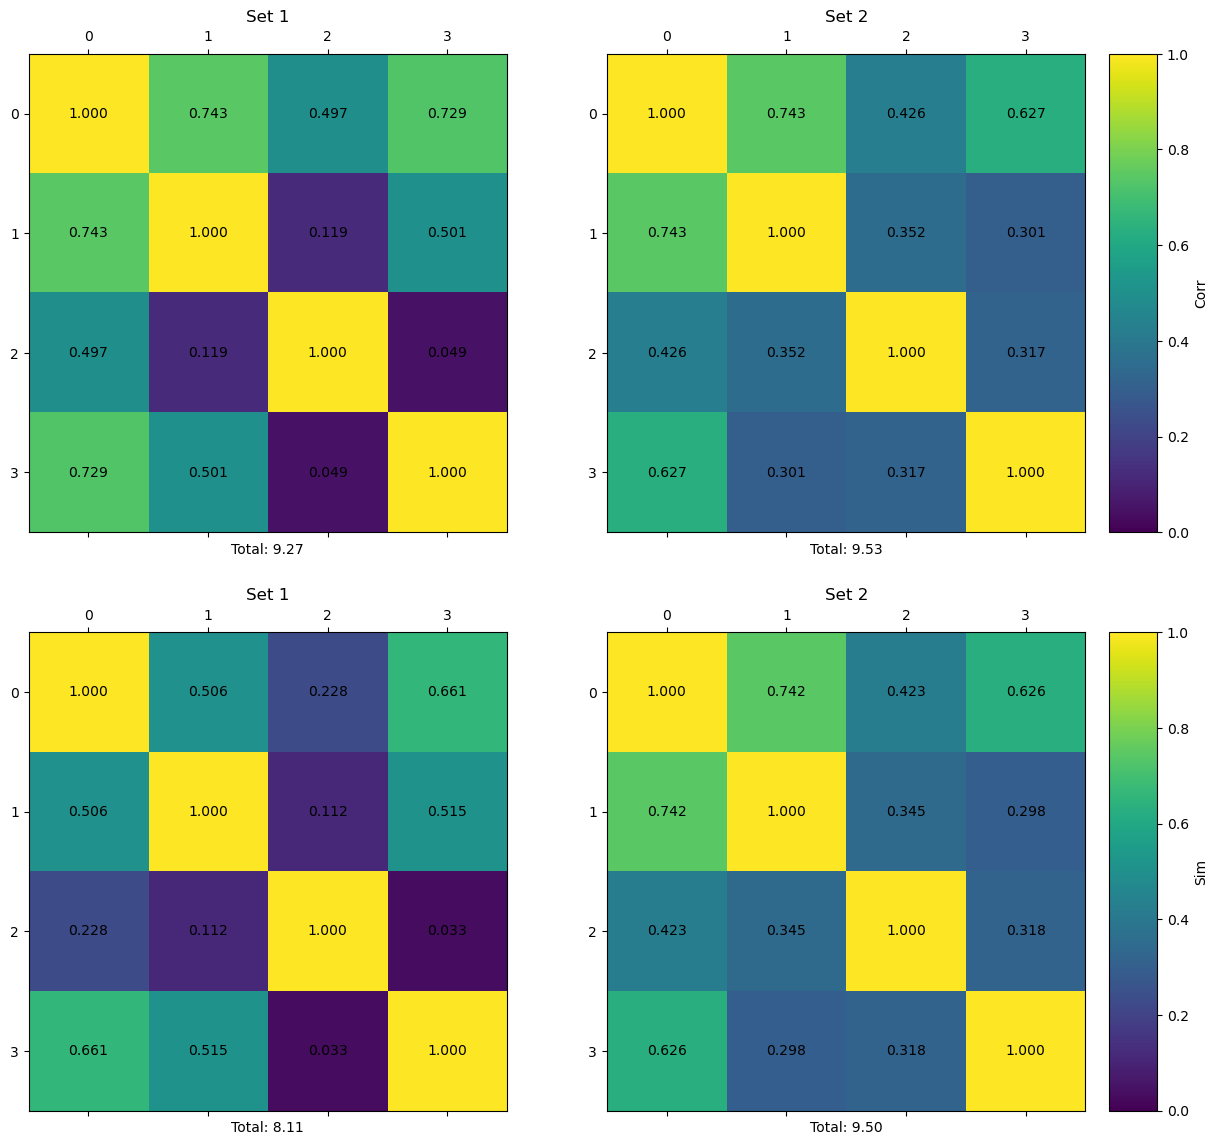

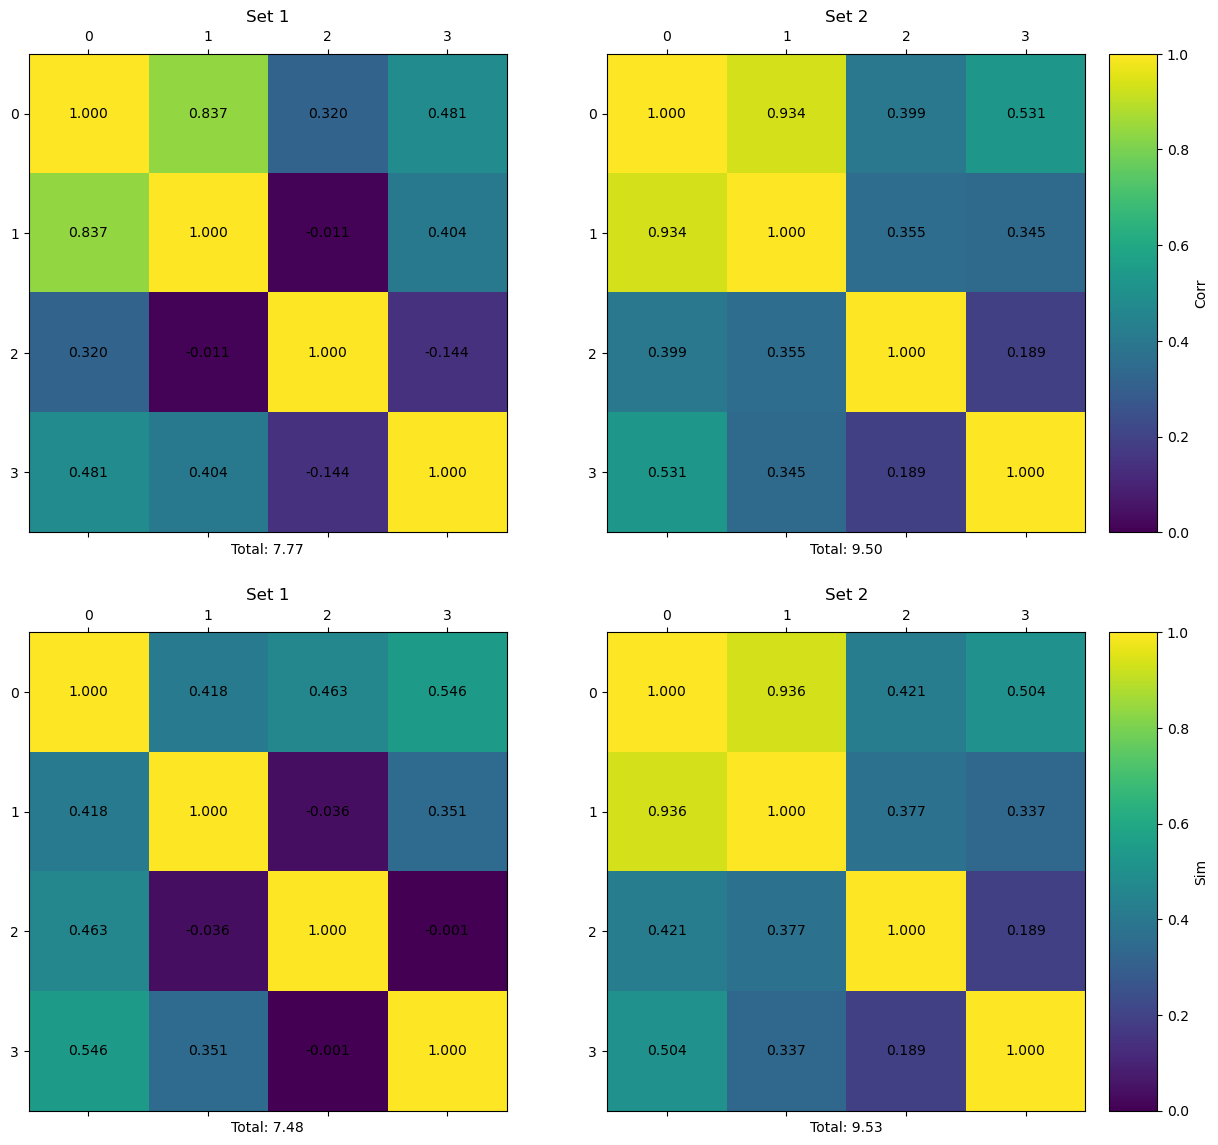

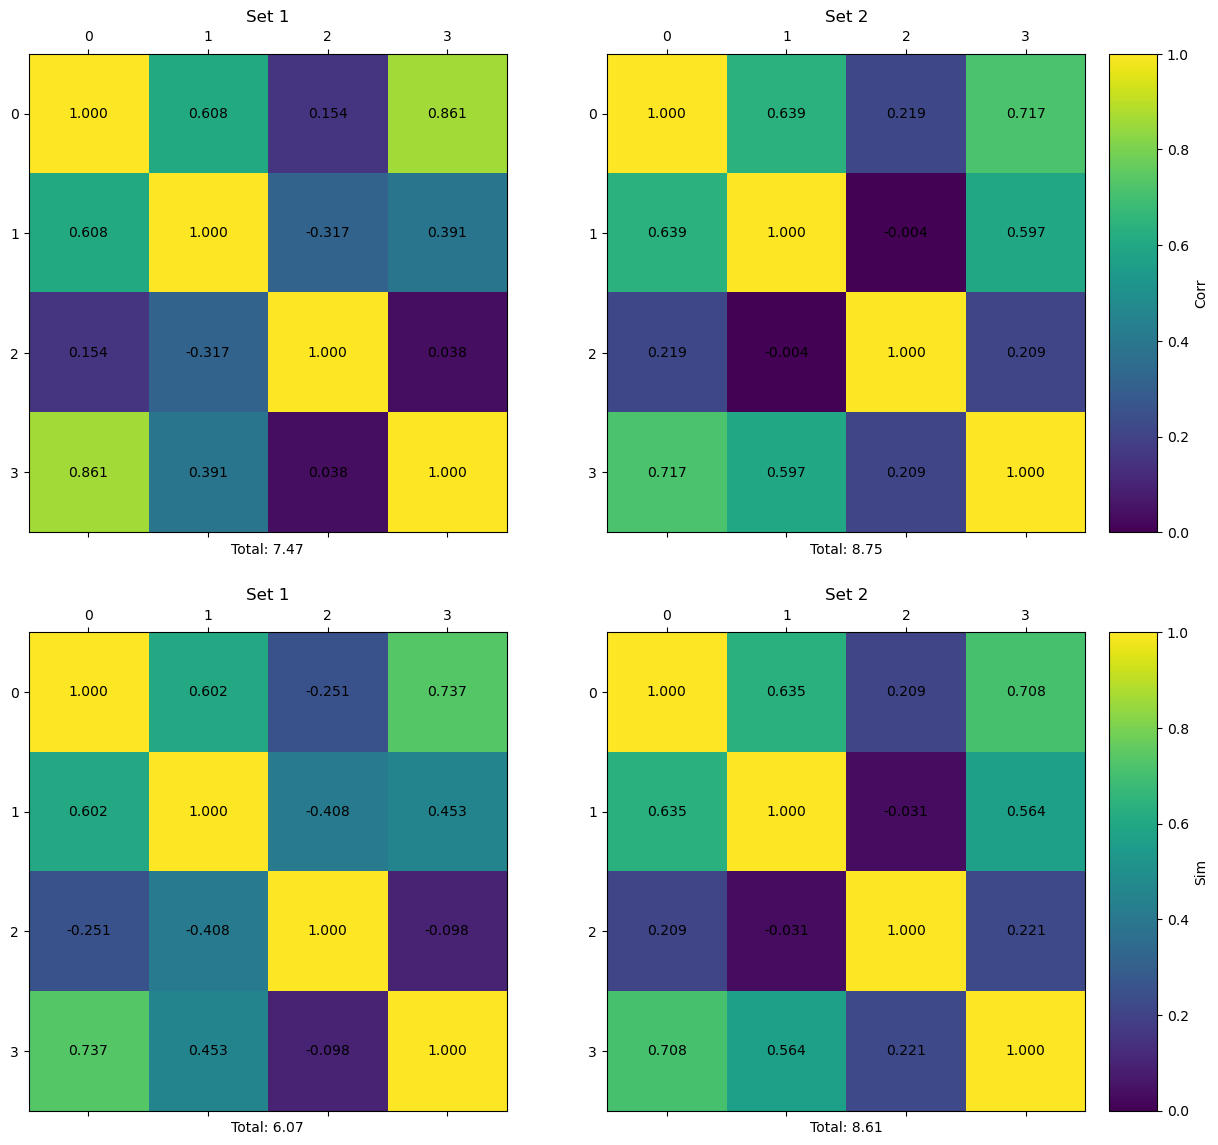

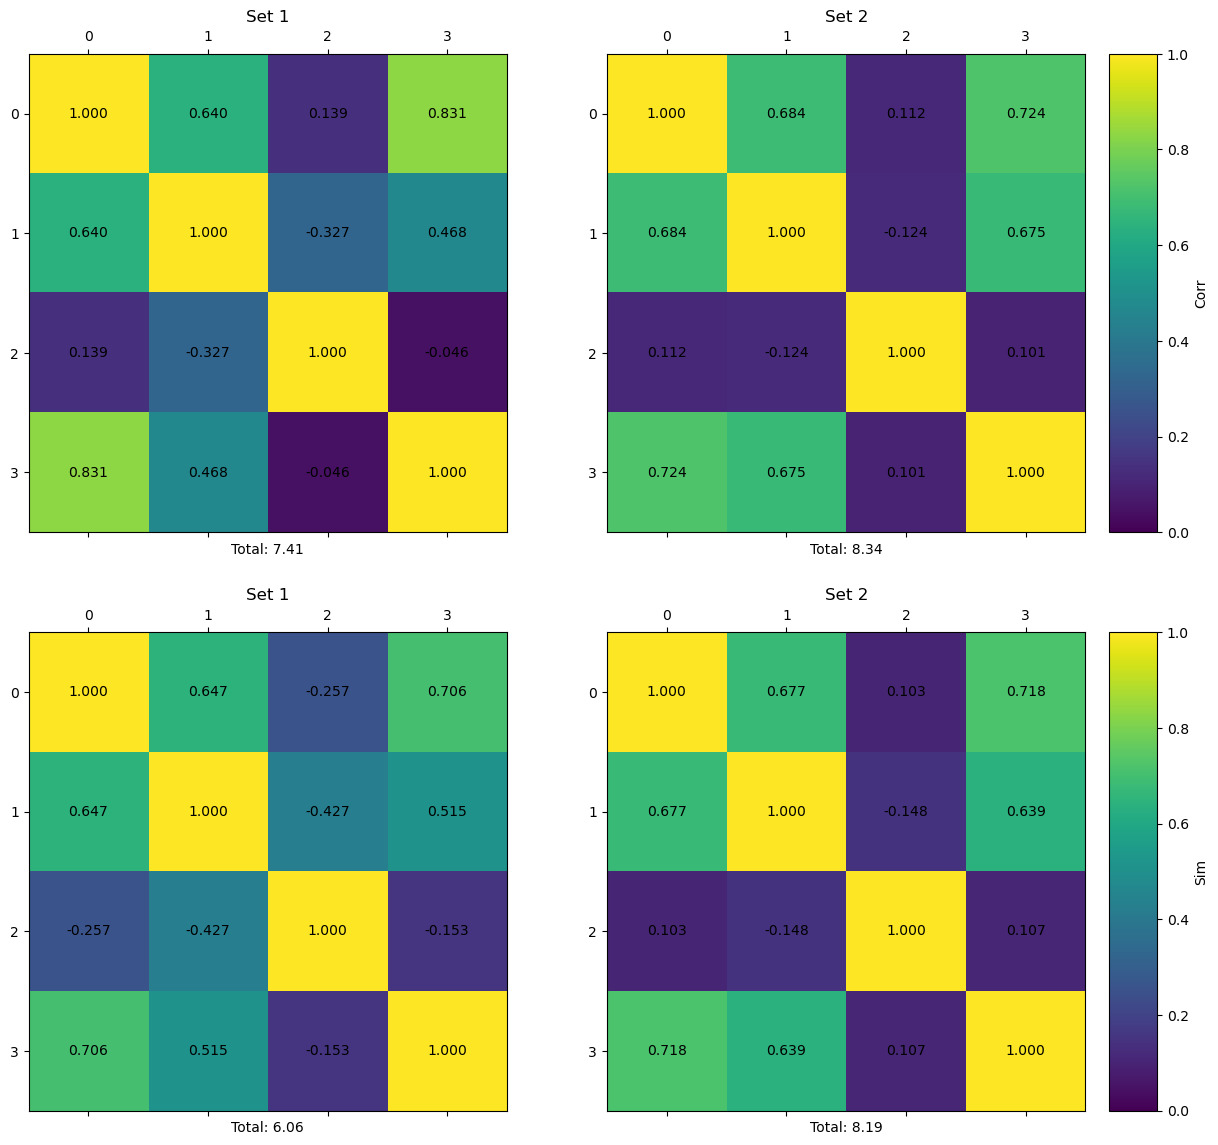

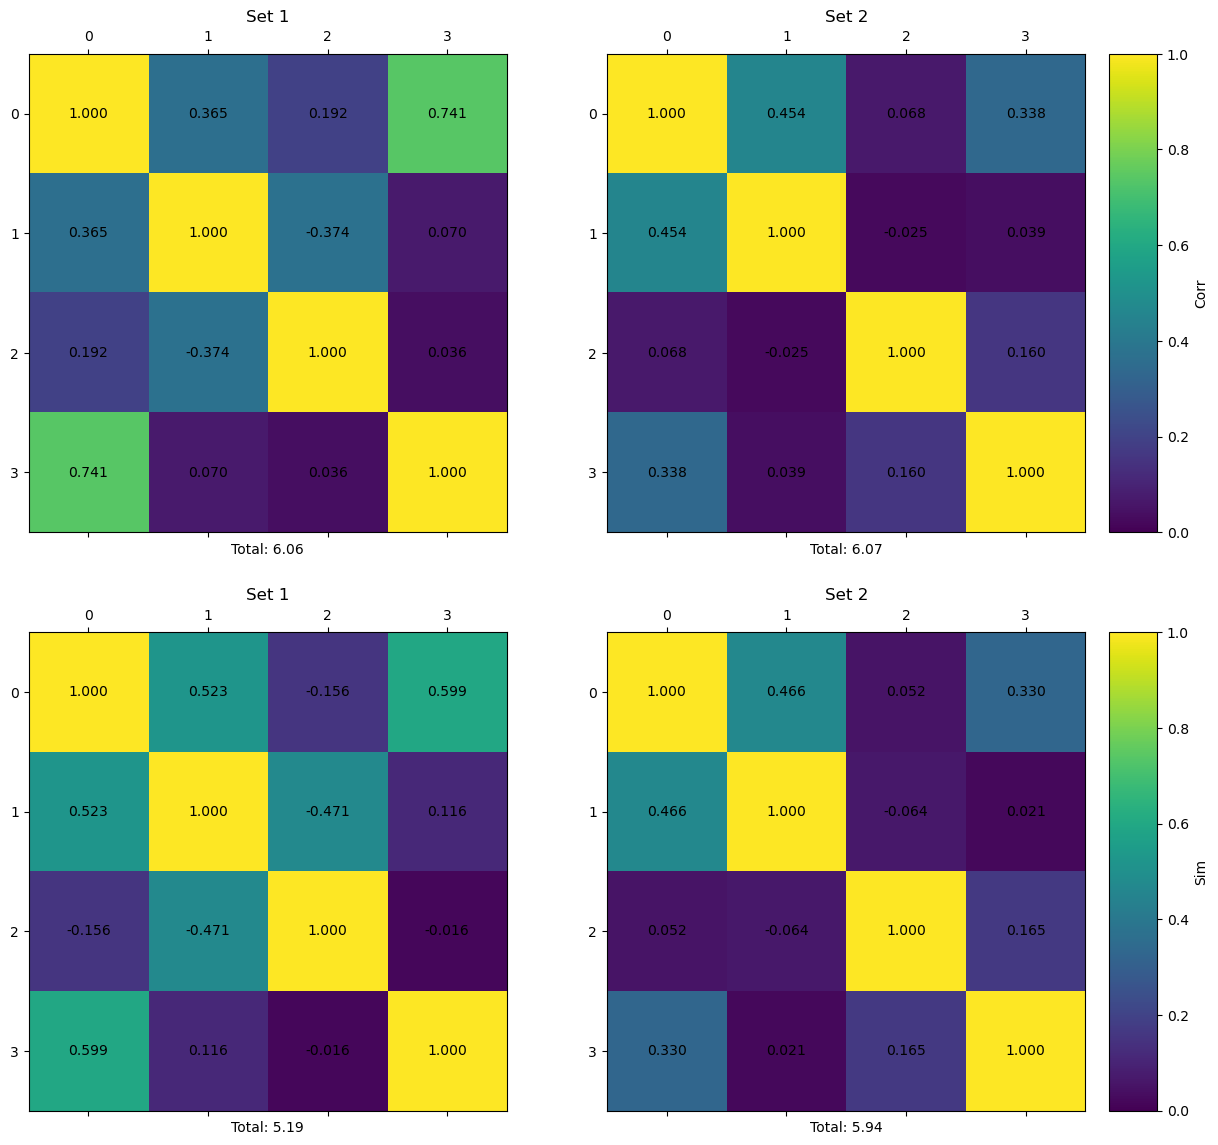

In [18]:
toggle = True
for d in ds:
    data_fed = None
    data_non = None
    for f in fs:
        for g in gs:
            # dt = pd.read_csv(fed_fn.format(f,g),delim_whitespace=True, header=None, index_col=False)#.mean(axis=0)
            # ft = pd.read_csv(non_fn.format(f,g),delim_whitespace=True, header=None, index_col=False)#.mean(axis=0)
            
            # dt = np.loadtxt(fed_fn.format(d,f,g))
            # ft = np.loadtxt(non_fn.format(d,f,g))
            
            dt = np.loadtxt(fed_fn.format(g,d))
            ft = np.loadtxt(non_fn.format(g,d))
            
            if data_fed is None:
                data_fed = dt
            else:
                data_fed = np.vstack((data_fed,dt))
            if data_non is None:
                data_non = ft
            else:
                data_non = np.vstack((data_non,ft))
    data_fed = data_fed
    data_non = data_non


    print(data_fed.shape)
    size = data_fed.shape[0]

    dist_fed = np.zeros((size,size))
    dist_non = np.zeros((size,size))

    sim_fed = np.ones((size,size))
    sim_non = np.ones((size,size))
    for comb in combinations(range(size), 2):
        a = data_fed[comb[0]]
        b = data_fed[comb[1]]
        a = a / np.linalg.norm(a)
        b = b / np.linalg.norm(b)
        dist_fed[comb[0],comb[1]] = np.linalg.norm(a - b)
        dist_fed[comb[1],comb[0]] = np.linalg.norm(a - b)
        
        a = data_non[comb[0]]
        b = data_non[comb[1]]
        a = a / np.linalg.norm(a)
        b = b / np.linalg.norm(b)
        dist_non[comb[0],comb[1]] = np.linalg.norm(a - b)
        dist_non[comb[1],comb[0]] = np.linalg.norm(a - b)
    for comb in combinations(range(size), 2):
        a = data_fed[comb[0]]
        b = data_fed[comb[1]]
        a = a / np.linalg.norm(a)
        b = b / np.linalg.norm(b)
        ans = np.dot(a,b)
        sim_fed[comb[0],comb[1]] = ans
        sim_fed[comb[1],comb[0]] = ans
        
        a = data_non[comb[0]]
        b = data_non[comb[1]]
        a = a / np.linalg.norm(a)
        b = b / np.linalg.norm(b)
        ans = np.dot(a,b)
        sim_non[comb[0],comb[1]] = ans
        sim_non[comb[1],comb[0]] = ans
    
    fig = plt.figure(figsize=(9 * 1.618, 18))
    # fig.subplots_adjust(left=0.05, right=0.93)   
    grid = AxesGrid(fig, 111,  # similar to subplot(122)
                    nrows_ncols=(2, 2),
                    axes_pad=1,
                    label_mode="all",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="10%",
                    cbar_pad="5%"
                    )

    # fig, ax = plt.subplots(2,2, figsize = (6 * 1.618, 6))
    a = grid[0].matshow(np.abs(np.corrcoef(data_fed)), vmin=0, vmax=1)
    if toggle:
        for (i, j), z in np.ndenumerate(np.corrcoef(data_fed)):
            grid[0].text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    grid[0].set_title("Set 1")
    grid[0].set_xlabel("Total: {:.2f}".format(np.corrcoef(data_fed).sum()))

    a = grid[1].matshow(np.abs(np.corrcoef(data_non)), vmin=0, vmax=1)
    if toggle:
        for (i, j), z in np.ndenumerate(np.corrcoef(data_non)):
            grid[1].text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    grid[1].set_title("Set 2")
    grid[1].set_xlabel("Total: {:.2f}".format(np.corrcoef(data_non).sum()))
    
    
    
    grid.cbar_axes[0].colorbar(a)
    
    
    a = grid[2].matshow(np.abs(sim_fed),vmin = 0,vmax=1)
    if toggle:
        for (i, j), z in np.ndenumerate(sim_fed):
            grid[2].text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    grid[2].set_title("Set 1")
    grid[2].set_xlabel("Total: {:.2f}".format(sim_fed.sum()))

    a = grid[3].matshow(np.abs(sim_non),vmin = 0, vmax=1)
    if toggle:
        for (i, j), z in np.ndenumerate(sim_non):
            grid[3].text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    grid[3].set_title("Set 2")
    grid[3].set_xlabel("Total: {:.2f}".format(sim_non.sum()))
    grid.cbar_axes[1].colorbar(a)

    grid.cbar_axes[0].toggle_label(True)
    grid.cbar_axes[0].axis[grid.cbar_axes[0].orientation].set_label('Corr')
    
    grid.cbar_axes[1].toggle_label(True)
    grid.cbar_axes[1].axis[grid.cbar_axes[0].orientation].set_label('Sim')
    
    
    s_fed_t.append(sim_fed.sum())
    s_non_t.append(sim_non.sum())

    c_fed_t.append(np.corrcoef(data_fed).sum())
    c_non_t.append(np.corrcoef(data_non).sum())
    # plt.savefig(r"tessstttyyy{}.png".format(d), bbox_inches='tight')
    
    

7.936955999554006
9.377344527457726
8.902649206294518
9.408551025754551


[]

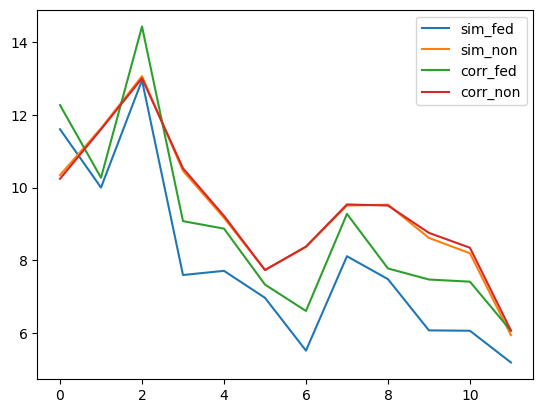

In [19]:
plt.plot(s_fed_t, label="sim_fed")
plt.plot(s_non_t, label="sim_non")


plt.plot(c_fed_t, label="corr_fed")
plt.plot(c_non_t, label="corr_non")
print(sum(s_fed_t) / len(s_fed_t))
print(sum(s_non_t) / len(s_non_t))
print(sum(c_fed_t) / len(c_fed_t))
print(sum(c_non_t) / len(c_non_t))
plt.legend()
plt.plot()